<a href="https://colab.research.google.com/github/maheshkumar30/Intellipaat-DataScience/blob/main/HRAnalytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**HR Analytics Case Study**

##**The Business Problem**

**SimpleYard, a growing company is facing a high attrition rate among their employees which in turn affects their business due to lack of expertise and experience.**

* **Their HR department is assigned the task to reduce the attrition rate by retaining employees who are about to churn out.**

* **They need to recommend special plans or strategies which will help them to retain their employees which in turn will help them to grow bigger as a company**

Dataset Link: https://drive.google.com/file/d/1Ob7vUaqyhT3dWwIARFObW_pXRPh1GZwx/view?usp=sharing

**Import libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Configurational library**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

**Loading our dataset and do data inspection**

In [ ]:
df = pd.read_csv('employe.csv')

In [ ]:
df.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.37,0.52,2,159,3,0,1,0,sales,low
4,0.41,0.50,2,153,3,0,1,0,sales,low


In [ ]:
a = df.shape
print(f'Rows: {a[0]} Columns: {a[1]}')

Rows: 14999 Columns: 10


**Insight**
* **Left Column** is the one which tells us if an employee has left the company or not
* The other columns can be a very important features for an employee to leave the company

**Personally identifiable information (PII) - Some private data like Name, Addres Region that can led to social conflicts**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfactoryLevel      14999 non-null  float64
 1   lastEvaluation         14999 non-null  float64
 2   numberOfProjects       14999 non-null  int64  
 3   avgMonthlyHours        14999 non-null  int64  
 4   timeSpent.company      14999 non-null  int64  
 5   workAccident           14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotionInLast5years  14999 non-null  int64  
 8   dept                   14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


**Insights**
* No Null values
* Salary and dept --> obeject Data
* Salary can be a considerable factor for an employee to leave the company
* promotionInLast5years plays also a significant role

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfactoryLevel,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
lastEvaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
numberOfProjects,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
avgMonthlyHours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
timeSpent.company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
workAccident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
promotionInLast5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0


**Insight**
* On an average an employee is getting overworked as we can see mean of working hours is 201
* On an average employees are 60% satisfied from the company

**Solution**
*  We can promote more people

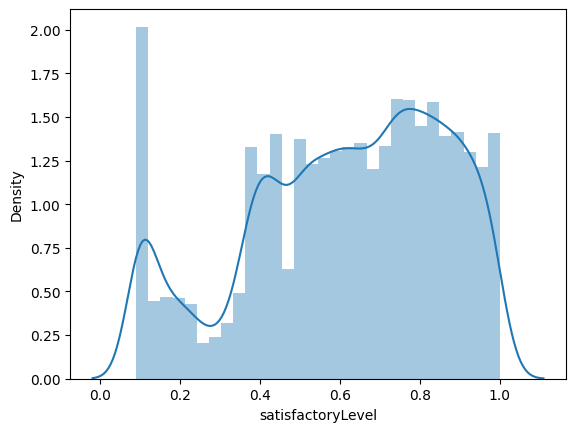

In [ ]:
sns.distplot(df['satisfactoryLevel'])
plt.show()

**Most employee are not satisfied with the company (less than 20%)**


In [ ]:
df.isnull().sum()

,0
satisfactoryLevel,0
lastEvaluation,0
numberOfProjects,0
avgMonthlyHours,0
timeSpent.company,0
workAccident,0
left,0
promotionInLast5years,0
dept,0
salary,0


In [ ]:
df.duplicated().sum()

np.int64(3008)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

np.int64(0)

**Shape inspection**

In [ ]:
a = df.shape
print(f'Rows: {a[0]} Columns: {a[1]}')

Rows: 11991 Columns: 10


**Let's Visualize the data for better understanding**

**1. How many employees are there in the company and how many have already left**

In [ ]:
df.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.37,0.52,2,159,3,0,1,0,sales,low
4,0.41,0.50,2,153,3,0,1,0,sales,low


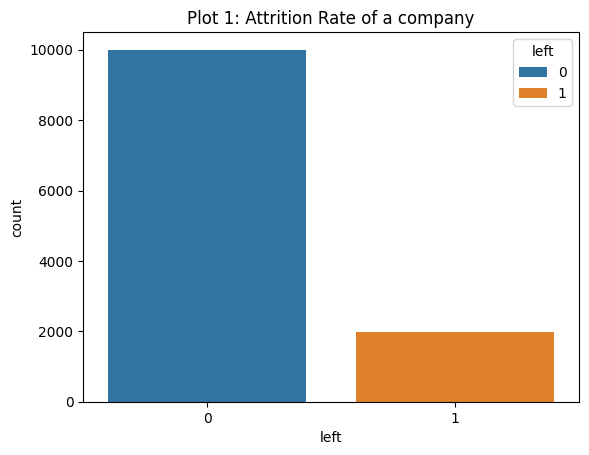

In [ ]:
sns.countplot(x=df['left'],hue=df['left'])
plt.title('Plot 1: Attrition Rate of a company')
plt.show()

**The people who have left company are 10000 adn the one who did not left 1991**

In [ ]:
df["left"].value_counts()

,count
left,
0,10000
1,1991


In [ ]:
df["left"].value_counts(normalize=True)*100

,proportion
left,
0,83.39588
1,16.60412


**Which department has most number of employee who churned out**

In [ ]:
data=df.groupby(["dept","left"]).size().reset_index()
data

,dept,left,0
0,IT,0,818
1,IT,1,158
2,RandD,0,609
3,RandD,1,85
4,accounting,0,512
5,accounting,1,109
6,hr,0,488
7,hr,1,113
8,management,0,384
9,management,1,52


**Piviot Table**

In [ ]:
piviotdata=data.pivot(index="dept",columns="left")
piviotdata

0     
left            0    1
dept                  
IT            818  158
RandD         609   85
accounting    512  109
hr            488  113
management    384   52
marketing     561  112
product_mng   576  110
sales        2689  550
support      1509  312
technical    1854  390

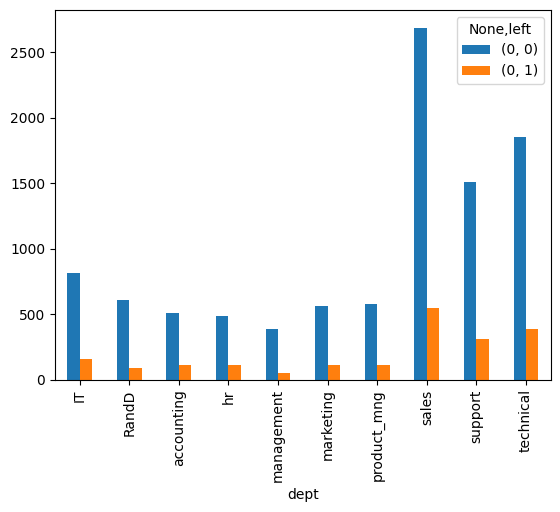

In [ ]:
piviotdata.plot(kind="bar")
plt.show()

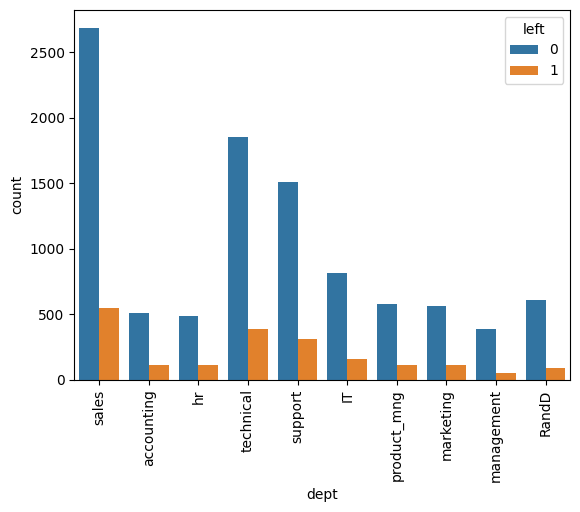

In [ ]:
sns.countplot(x=df["dept"],hue=df["left"])
plt.xticks(rotation=90)
plt.show()

**Insights**
* Sales is one with highest attrition rate
* Management is the lowest

In [ ]:
df.columns

Index(['satisfactoryLevel', 'lastEvaluation', 'numberOfProjects',
       'avgMonthlyHours', 'timeSpent.company', 'workAccident', 'left',
       'promotionInLast5years', 'dept', 'salary'],
      dtype='object')

**What is the attrition rate of employee leaving the company having project less 3**

In [ ]:
a=df[df["numberOfProjects"]<3]
# b=df[df["numberOfProjects"]>3]
print(a)
# print(b)

       satisfactoryLevel  lastEvaluation  numberOfProjects  avgMonthlyHours  \
0                   0.38            0.53                 2              157   
3                   0.37            0.52                 2              159   
4                   0.41            0.50                 2              153   
7                   0.42            0.53                 2              142   
8                   0.45            0.54                 2              135   
...                  ...             ...               ...              ...   
14877               0.45            0.47                 2              146   
14900               0.45            0.46                 2              142   
14913               0.94            0.89                 2              118   
14915               0.39            0.57                 2              131   
14956               0.26            0.37                 2              232   

       timeSpent.company  workAccident  left  promo

In [ ]:
less=df.loc[(df['numberOfProjects']<3)&(df["left"]==1)]
less

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
3,0.37,0.52,2,159,3,0,1,0,sales,low
4,0.41,0.50,2,153,3,0,1,0,sales,low
7,0.42,0.53,2,142,3,0,1,0,sales,low
8,0.45,0.54,2,135,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14740,0.43,0.48,2,157,3,0,1,0,support,low
14803,0.42,0.52,2,151,3,0,1,0,sales,medium
14877,0.45,0.47,2,146,3,0,1,0,sales,medium
14900,0.45,0.46,2,142,3,0,1,0,product_mng,low


In [ ]:
att=(857/11991)*100
att

7.147026936869319

In [ ]:
less=df.loc[(df['numberOfProjects']>=5)&(df["left"]==1)]
less

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
5,0.10,0.77,6,247,4,0,1,0,sales,low
6,0.92,0.85,5,259,5,0,1,0,sales,low
9,0.11,0.81,6,305,4,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14786,0.09,0.85,5,281,4,0,1,0,support,medium
14883,0.11,0.86,6,308,4,0,1,0,IT,low
14899,0.10,0.89,6,280,4,0,1,0,product_mng,medium
14914,0.10,0.86,6,288,4,0,1,0,sales,medium


In [ ]:
att=(859/11991)*100
att

7.163706112918023

In [ ]:
print(f"Percentage:{((len(less)/11991)*100)}%")
print(f"The total number of people:{len(less)}")

Percentage:7.163706112918023%
The total number of people:859


**The number of project is not very influencial factor to determine if an employee is going to leave a company or not**

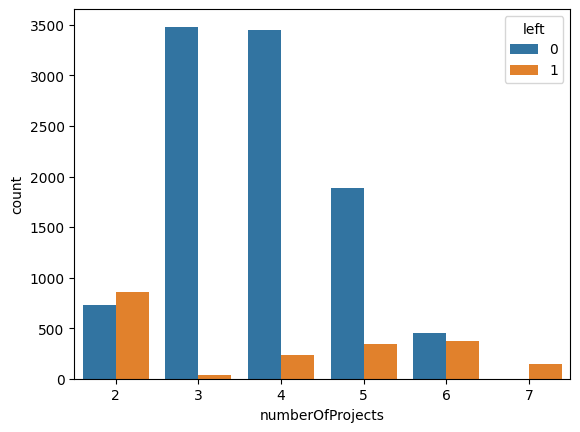

In [ ]:
sns.countplot(x=df["numberOfProjects"],hue=df["left"])
plt.show()

**The number of projects with

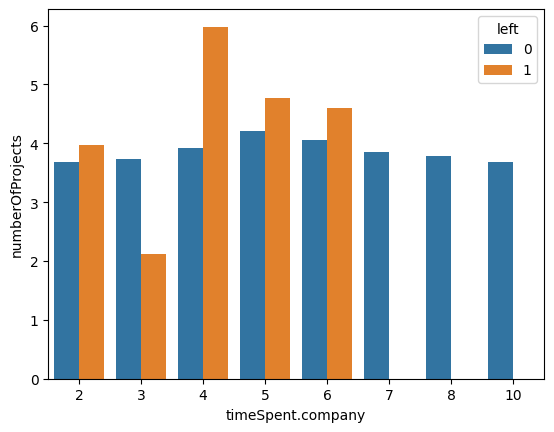

In [ ]:
sns.barplot(x=df["timeSpent.company"],y=df["numberOfProjects"],hue=df["left"],errorbar=["ci",False])
plt.show()

**Insight**

We need to work fresher and mainly mid senior level


**How The salary Could be reason**

**Compare the time spend with respect to salary**

#**Finalize the result**